# Classification of handwritten digits using MLN

# MNIST Dataset

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" title="MNIST dataset" align="center"/>



# Problem
Classify handwritten digits from 0 - 9. <br>
Each image is 28x28 pixels

<img src="https://corochann.com/wp-content/uploads/2017/02/mnist_plot.png" title="" align="center"/>


# Understanding the data

In [1]:
# MNIST data is present in the keras library. You may load it from there
from keras.datasets import mnist
def load_data():
    """
    Inputs:
        None
    Outputs:
        train_samples, train_labels, test_samples, test_labels: numpy arrays
    
    Load the train/test of mnist data into these variables
    """
    # YOUR CODE HERE
    (train_samples, train_labels), (test_samples, test_labels) = mnist.load_data()
    return train_samples, train_labels, test_samples, test_labels 

train_samples, train_labels, test_samples, test_labels = load_data()

Using TensorFlow backend.


In [0]:
train_samples2=train_samples

In [3]:
"""Test cases"""
assert train_samples.shape == (60000, 28, 28)
assert test_labels.shape == (10000,)
print('Test passed', '\U0001F44D')


Test passed 👍


### Shape of Data


In [4]:
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Range of Values

In [5]:
import numpy as np
np.amax(train_samples) # Max value

255

In [6]:
np.amin(train_samples) # Min Value

0

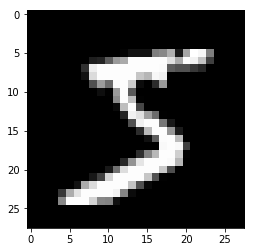

Label of image is 5


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

pixels = train_samples[0] # Shape (28, 28)
plt.imshow(pixels, cmap='gray')
plt.show()
print('Label of image is', train_labels[0])

# Data Preparation

### Normalize inputs to (0, 1)

In [0]:
def convert_dtype(x):
    """
    Inputs:
        x: numpy array
    Outputs:
        x_float: numpy array, dtype of elements changed to 'float32'
    """
    # YOUR CODE HERE
    x_float=x.astype('float32')
    return x_float
train_samples = convert_dtype(train_samples)
test_samples = convert_dtype(test_samples)

In [9]:
print(train_samples[0],train_labels[0])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

In [10]:
"""Test cases"""
assert str(train_samples.dtype) == 'float32'
print('Test passed', '\U0001F44D')


Test passed 👍


In [0]:
def normalize(x):
    """
    Inputs:
        x: numpy array
    Outputs:
        x_n: numpy array, elements normalized to be between (0, 1)
    """    
    # YOUR CODE HERE
    x_n=x/255
    return x_n
    
train_samples = normalize(train_samples)
test_samples = normalize(test_samples) 


In [12]:
"""Test cases"""
assert np.isclose(np.amax(train_samples), 1)
print('Test passed', '\U0001F44D')


Test passed 👍


In [0]:

def reshape(x):
    """
    We need to reshape our train_data to be of shape (samples, height, width, channels) pass to Conv2D layer of keras
    Inputs:
        x: numpy array of shape(samples, height, width)
    Outputs:
        x_r: numpy array of shape(samples, height, width, 1)
    """
    # YOUR CODE HERE
    
    x_r=x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
    return x_r

train_samples = reshape(train_samples)
test_samples = reshape(test_samples)

In [14]:
train_samples.shape

(60000, 28, 28, 1)

### Convert outputs to 1-hot vectors
\begin{equation*}
Eg: 5 \rightarrow [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
\end{equation*}

In [15]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [0]:
def oneHot(y, Ny):
    """
    Inputs:
        y: numpy array if shape (samples, ) with class labels
        Ny: number of classes
    Outputs:
        y_oh: numpy array of shape (samples, Ny) of one hot vectors
    """
    # YOUR CODE HERE
    y_oh=[]
    for i in y:
      temp=np.zeros(Ny)
      temp[i]=1
      y_oh+=[temp]
    return np.array(y_oh)

# example
train_labels = oneHot(train_labels, 10)
test_labels = oneHot(test_labels, 10)

In [17]:
"""Test cases"""
assert train_labels.shape[1] == 10
print('Test passed', '\U0001F44D')


Test passed 👍


In [18]:
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Create a convolutional neural network model
You may design whatever cnn model you like. But following are hints to get started.<br>
Make the following layers:
1. cnn layer with kernel_size = (5, 5) and 32 kernels
2. cnn layer with kernel_size = (3, 3) and 20 kernels
3. Maxpooling layer of size (2, 2)
4. Flatten layer
5. Dense layer of appropriate size
6. Output layer of appropriate size

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

In [20]:
def create_model():
    """
    Inputs:
        None
    Outputs:
        model: compiled keras model
    """
    # YOUR CODE HERE
    model=Sequential()
    model.add(Conv2D(32,kernel_size=(5,5),activation="relu",input_shape=(28,28,1)))
    model.add(Conv2D(20,kernel_size=(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(20,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
    return model

model = create_model()

W0623 13:08:14.839681 139708733093760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 13:08:14.859760 139708733093760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 13:08:14.862575 139708733093760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 13:08:14.890236 139708733093760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0623 13:08:14.924022 139708733093760 deprecation_wrapp

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 20)        5780      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2420)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                48420     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 55,242
Trainable params: 55,242
Non-trainable params: 0
_________________________________________________________________


In [22]:
print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [23]:
history = model.fit(train_samples, train_labels, validation_split = 0.1, epochs=3, batch_size=200)
# Use 10% of samples for validation, validation_split is the relevant parameter


W0623 13:08:15.083700 139708733093760 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0623 13:08:15.144086 139708733093760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 5s 89us/step - loss: 0.3584 - acc: 0.8916 - val_loss: 0.0861 - val_acc: 0.9782
Epoch 2/3
54000/54000 [==============================] - 2s 34us/step - loss: 0.0830 - acc: 0.9748 - val_loss: 0.0657 - val_acc: 0.9805
Epoch 3/3
54000/54000 [==============================] - 2s 34us/step - loss: 0.0589 - acc: 0.9823 - val_loss: 0.0522 - val_acc: 0.9855


In [0]:
def predict(x,model):
    """
    Inputs:
        x: input samples
        model: keras model
    Outputs:
        y: predicted labels
    """
    # YOUR CODE HERE
    y=model.predict(x)
    return y

In [0]:
def oneHot_tolabel(y):
    """
    Inputs:
        y: numpy array of shape (samples, Ny)
    Outputs:
        y_b: numpy array of shape (samples,) where one hot encoding is converted back to class labels
    """
    # YOUR CODE HERE
    y_b=[]
    for i in y:
      y_b+=[np.argmax(i)]
    return np.array(y_b)
    

In [26]:
oneHot_tolabel(predict(test_samples,model))

array([7, 2, 1, ..., 4, 5, 6])

In [27]:
oneHot_tolabel(test_labels)

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
def create_confusion_matrix(true_labels, predicted_labels):
    """
    Inputs:
        true_labels: numpy array of shape (samples, ) with true_labels
        test_labels: numpy array of shape(samples, ) with test_labels
    Outputs:
        cm: numpy array of shape (Ny, Ny), confusion matrix. Ny -> number of unique classes in y
    """
    # YOUR CODE HERE
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(true_labels,predicted_labels)
    return cm

In [0]:
predicted_labels_train = predict(train_samples,model)

In [0]:
cm = create_confusion_matrix(oneHot_tolabel(train_labels), oneHot_tolabel(predict(train_samples,model)))

In [31]:
print(cm)

[[5880    1    5    3    1    1   23    1    3    5]
 [   1 6710   11    1    2    0    4    9    3    1]
 [   4   27 5864   18    4    0    2   17   13    9]
 [   2    4   13 6053    0   16    2   26    3   12]
 [   2   14    1    0 5769    1    9    9    3   34]
 [   4    8    4   33    4 5314   33    2    9   10]
 [   4    5    0    0    3    3 5900    0    3    0]
 [   1   18   24    5    6    1    0 6183    3   24]
 [  12   30   17   17   25   16   28   10 5652   44]
 [   7    8    0   19   24   10    1   22    8 5850]]


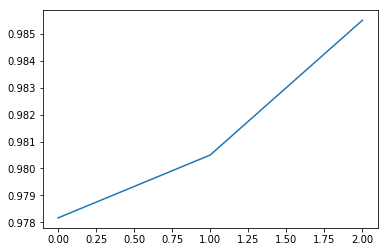

In [32]:
history.history.keys()
import matplotlib.pyplot as plt
plt.plot(range(len(history.history['val_acc'])), history.history['val_acc'])
plt.show()

In [33]:
def accuracy(x_test, y_test, model):
    """
    Inputs:
        x_test: test samples
        y_test : test labels
        model: keras model
    Ouputs:
        acc: float, accuracy of test data on model
    """
    # YOUR CODE HERE
    loss,acc=model.evaluate(x_test,y_test)
    return acc

acc = accuracy(test_samples, test_labels, model)
print('Test accuracy is, ', acc*100, '%')

10000/10000 [==============================] - 1s 57us/step
Test accuracy is,  98.55000000000001 %


In [0]:
### Advanced
# 1. Tune the hyperparameters to better the performance
# 2. Find the classes which are getting most confused from confusion matrix. Take out those samples. Plot them and see why they are getting confused.

In [35]:
model.fit(train_samples, train_labels, validation_split = 0.1, epochs=5, batch_size=200)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 2s 38us/step - loss: 0.0481 - acc: 0.9851 - val_loss: 0.0436 - val_acc: 0.9895
Epoch 2/5
54000/54000 [==============================] - 2s 35us/step - loss: 0.0392 - acc: 0.9882 - val_loss: 0.0422 - val_acc: 0.9885
Epoch 3/5
54000/54000 [==============================] - 2s 34us/step - loss: 0.0346 - acc: 0.9891 - val_loss: 0.0513 - val_acc: 0.9862
Epoch 4/5
54000/54000 [==============================] - 2s 34us/step - loss: 0.0287 - acc: 0.9908 - val_loss: 0.0430 - val_acc: 0.9880
Epoch 5/5
54000/54000 [==============================] - 2s 34us/step - loss: 0.0249 - acc: 0.9919 - val_loss: 0.0433 - val_acc: 0.9882


In [36]:
accuracy(test_samples, test_labels, model)

10000/10000 [==============================] - 0s 48us/step


0.9879

In [37]:
train_samples[0][0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

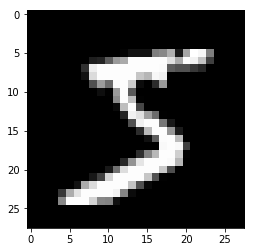

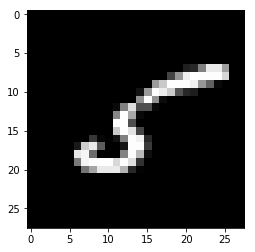

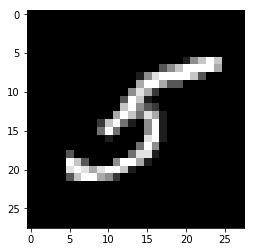

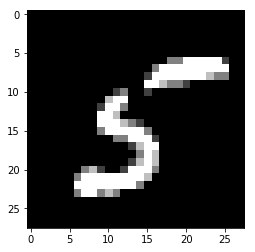

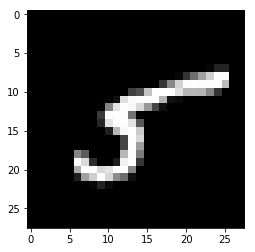

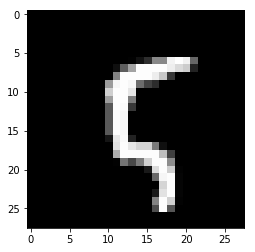

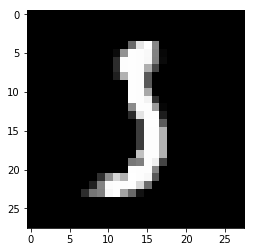

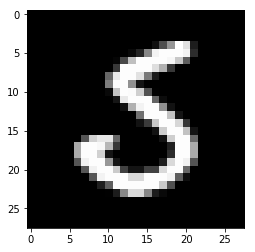

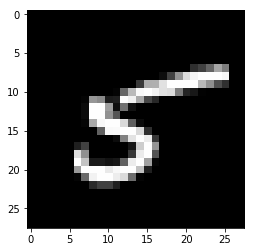

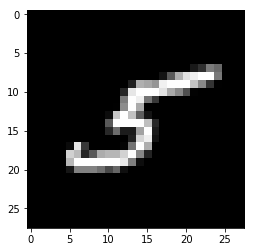

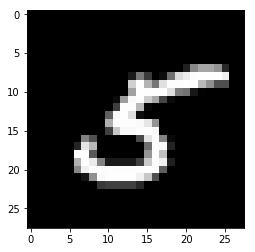

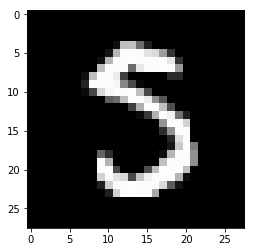

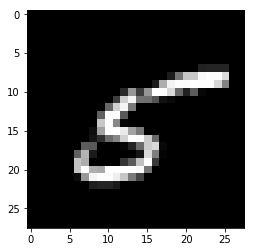

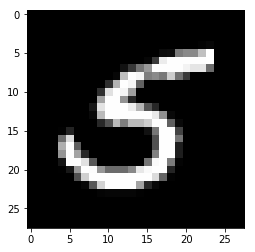

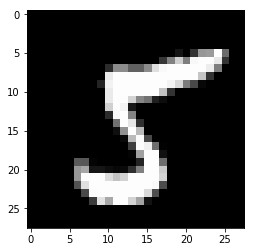

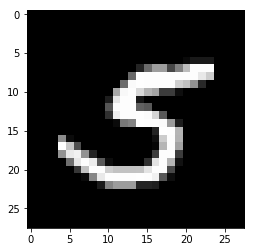

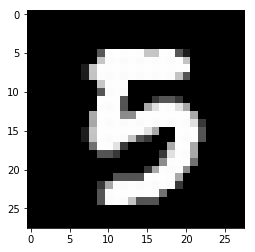

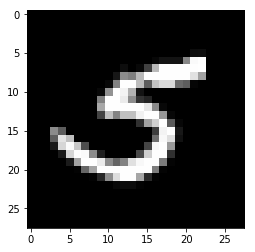

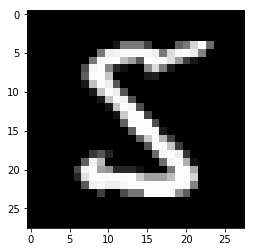

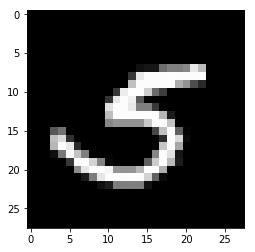

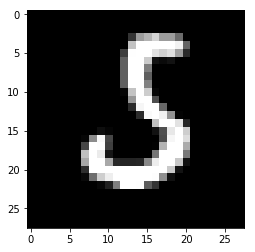

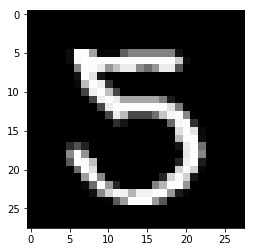

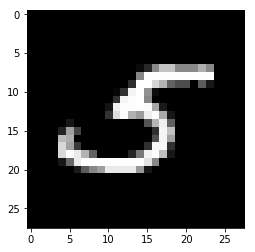

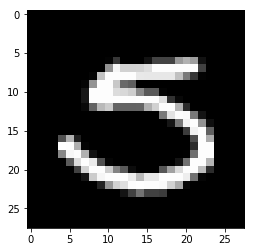

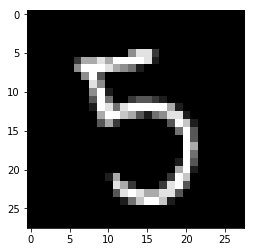

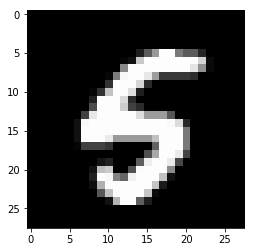

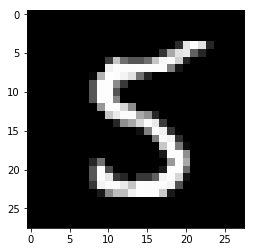

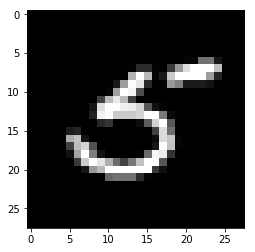

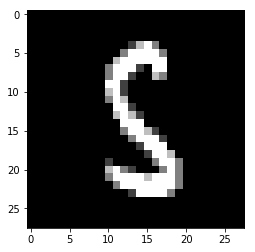

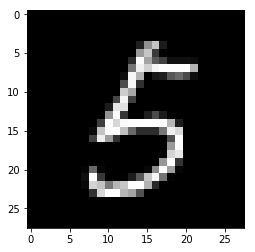

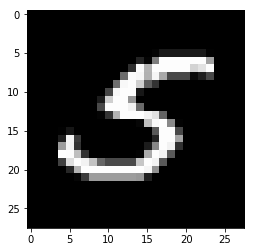

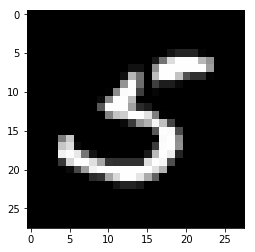

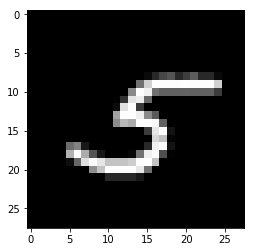

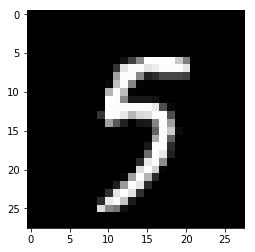

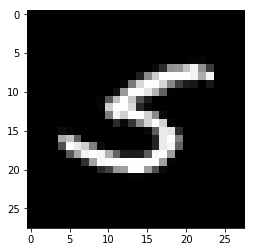

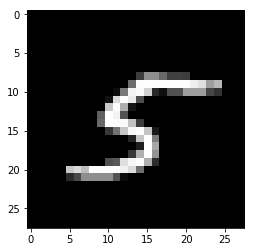

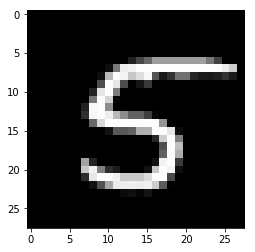

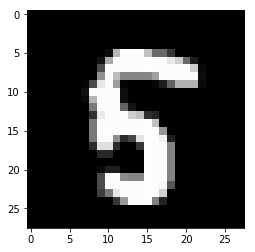

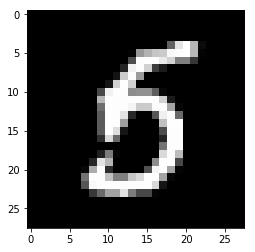

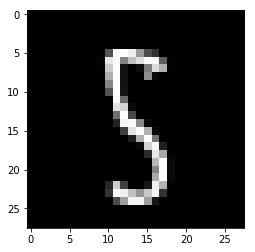

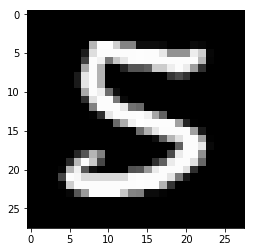

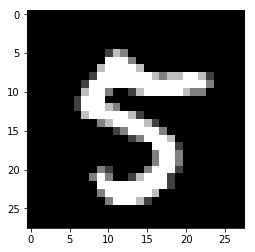

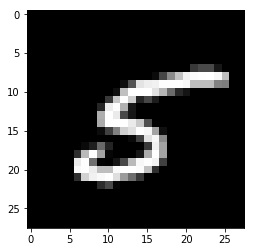

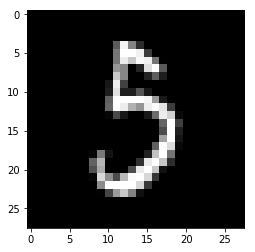

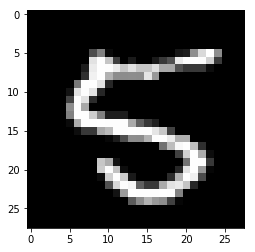

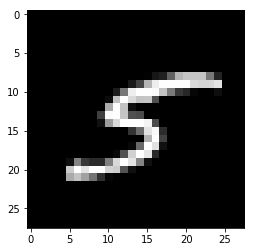

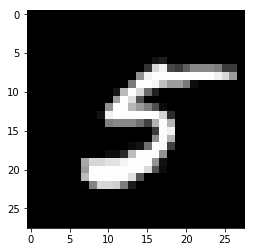

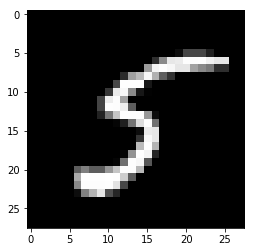

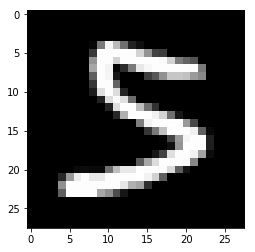

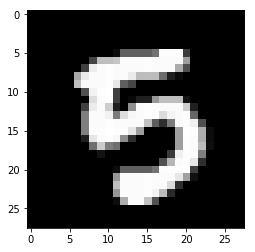

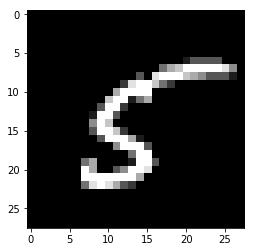

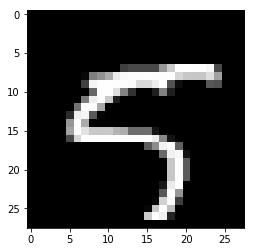

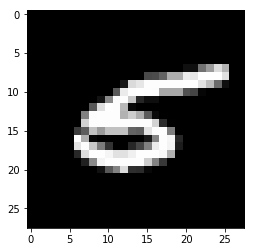

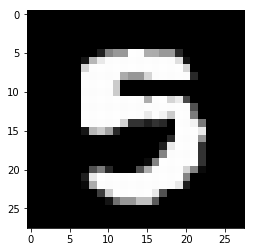

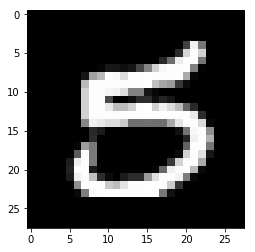

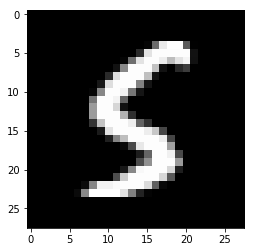

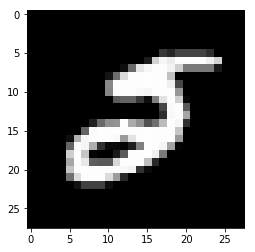

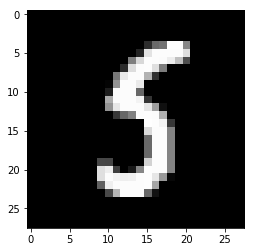

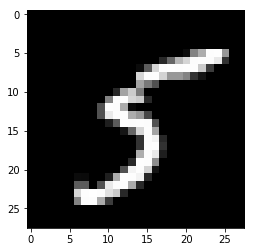

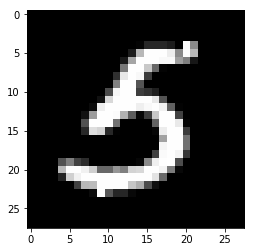

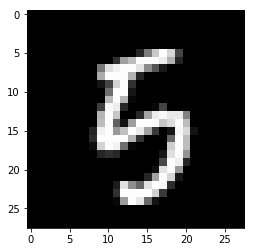

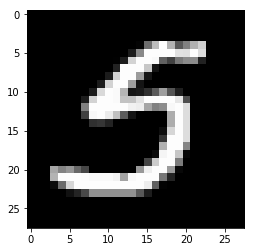

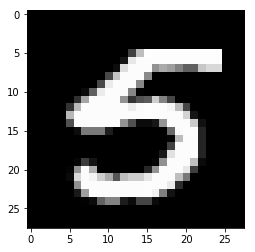

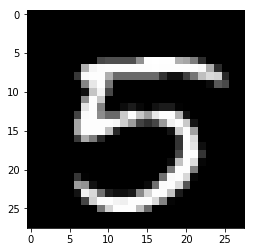

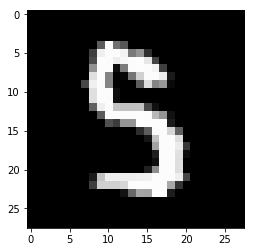

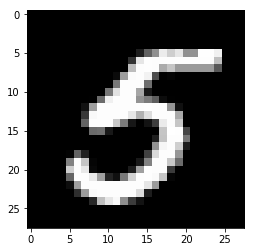

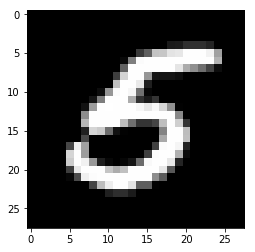

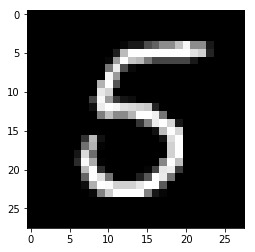

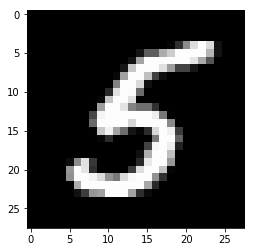

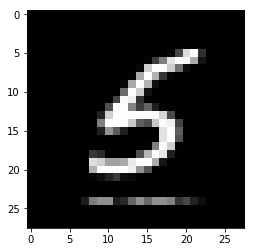

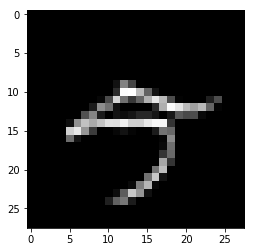

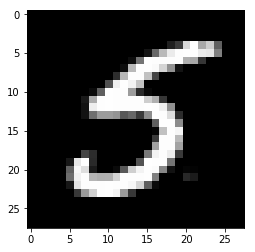

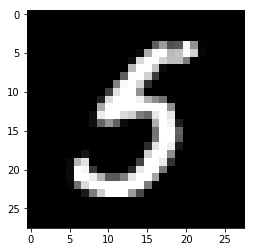

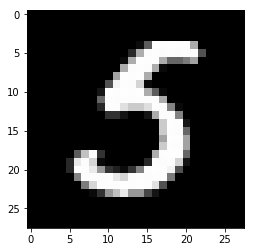

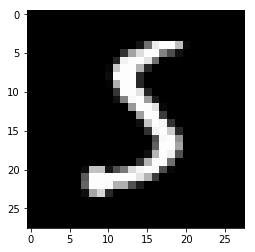

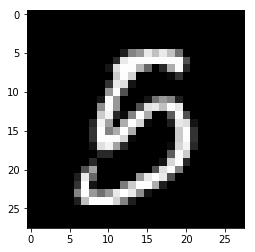

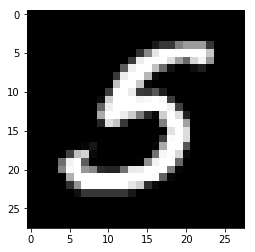

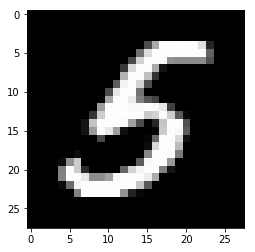

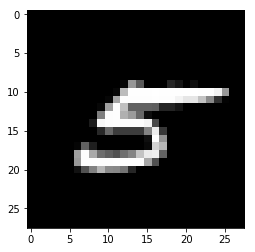

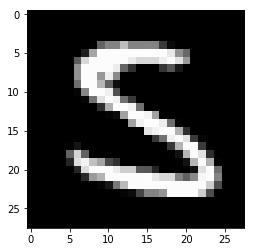

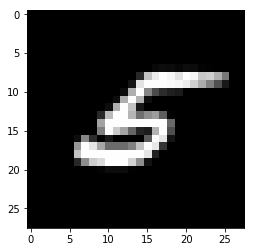

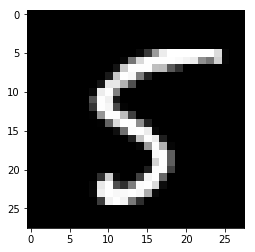

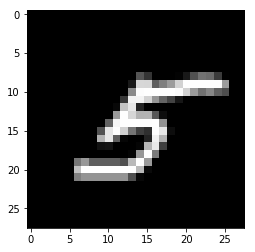

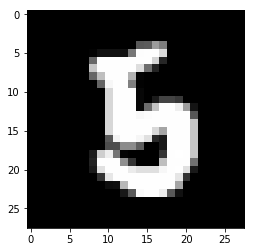

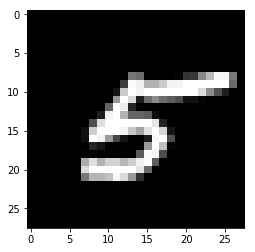

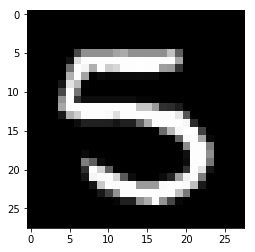

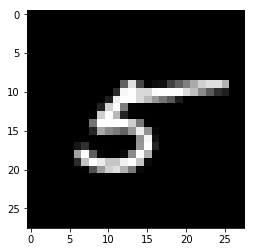

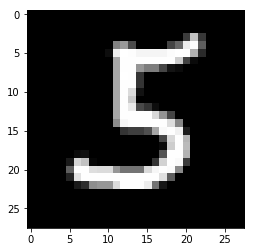

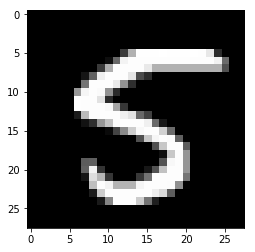

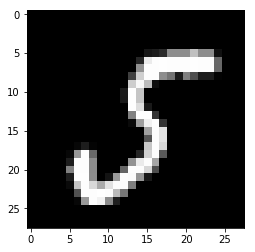

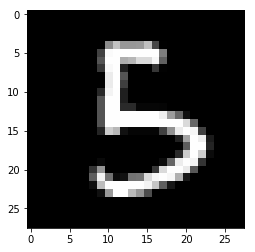

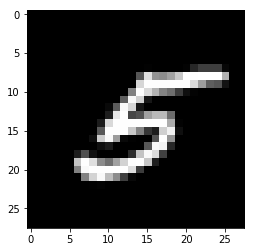

In [38]:
for i in range(1000):
  if(train_labels[i][5]==1):
    pixels = train_samples2[i] # Shape (28, 28)
    plt.imshow(pixels, cmap='gray')
    plt.show()